In [136]:
#Importing the Pandas, Numpy, Matplotlib and Seaborn Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px
import math

In [137]:
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_colwidth', None)
sns.set_style('darkgrid')

In [138]:
#Loading the dataset
df = pd.read_csv('loan.csv')

# Understanding the Data

In [139]:
# Describing the data

df.describe()

id     member_id     loan_amnt   funded_amnt  \
count  3.971700e+04  3.971700e+04  39717.000000  39717.000000   
mean   6.831319e+05  8.504636e+05  11219.443815  10947.713196   
std    2.106941e+05  2.656783e+05   7456.670694   7187.238670   
min    5.473400e+04  7.069900e+04    500.000000    500.000000   
25%    5.162210e+05  6.667800e+05   5500.000000   5400.000000   
50%    6.656650e+05  8.508120e+05  10000.000000   9600.000000   
75%    8.377550e+05  1.047339e+06  15000.000000  15000.000000   
max    1.077501e+06  1.314167e+06  35000.000000  35000.000000   

       funded_amnt_inv   installment    annual_inc           dti  \
count     39717.000000  39717.000000  3.971700e+04  39717.000000   
mean      10397.448868    324.561922  6.896893e+04     13.315130   
std        7128.450439    208.874874  6.379377e+04      6.678594   
min           0.000000     15.690000  4.000000e+03      0.000000   
25%        5000.000000    167.020000  4.040400e+04      8.170000   
50%        8975.000000    280.220000  5.900000e+04     13.400000   
75%       14400.000000    430.780000  8.230000e+04     18.600000   
max       35000.000000   1305.190000  6.000000e+06     29.990000   

        delinq_2yrs  inq_last_6mths  mths_since_last_delinq  \
count  39717.000000    39717.000000            14035.000000   
mean       0.146512        0.869200               35.900962   
std        0.491812        1.070219               22.020060   
min        0.000000        0.000000                0.000000   
25%        0.000000        0.000000               18.000000   
50%        0.000000        1.000000               34.000000   
75%        0.000000        1.000000               52.000000   
max       11.000000        8.000000              120.000000   

       mths_since_last_record      open_acc       pub_rec      revol_bal  \
count             2786.000000  39717.000000  39717.000000   39717.000000   
mean                69.698134      9.294408      0.055065   13382.528086   
std                 43.822529      4.400282      0.237200   15885.016641   
min                  0.000000      2.000000      0.000000       0.000000   
25%                 22.000000      6.000000      0.000000    3703.000000   
50%                 90.000000      9.000000      0.000000    8850.000000   
75%                104.000000     12.000000      0.000000   17058.000000   
max                129.000000     44.000000      4.000000  149588.000000   

          total_acc     out_prncp  out_prncp_inv   total_pymnt  \
count  39717.000000  39717.000000   39717.000000  39717.000000   
mean      22.088828     51.227887      50.989768  12153.596544   
std       11.401709    375.172839     373.824457   9042.040766   
min        2.000000      0.000000       0.000000      0.000000   
25%       13.000000      0.000000       0.000000   5576.930000   
50%       20.000000      0.000000       0.000000   9899.640319   
75%       29.000000      0.000000       0.000000  16534.433040   
max       90.000000   6311.470000    6307.370000  58563.679930   

       total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
count     39717.000000     39717.000000   39717.000000        39717.000000   
mean      11567.149118      9793.348813    2263.663172            1.363015   
std        8942.672613      7065.522127    2608.111964            7.289979   
min           0.000000         0.000000       0.000000            0.000000   
25%        5112.310000      4600.000000     662.180000            0.000000   
50%        9287.150000      8000.000000    1348.910000            0.000000   
75%       15798.810000     13653.260000    2833.400000            0.000000   
max       58563.680000     35000.020000   23563.680000          180.200000   

         recoveries  collection_recovery_fee  last_pymnt_amnt  \
count  39717.000000             39717.000000     39717.000000   
mean      95.221624                12.406112      2678.826162   
std      688.744771               148.671593      4447.136012   
min    

## Step 1: Cleaning

### Choosing columns
There are columns with `Nan` values.

In [140]:
df.isna().sum()

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12940
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


As seen above, there are columns which do not contain any values. Some of the columns contain not but few values.

In [141]:
(df.isna().sum() >= 0.5 * df.shape[0]).sum()

57

57 columns have more than 50% vlues as null. I am choosing not to use them and dropping them from analysis.

In [142]:
column_names = df.columns[df.isna().sum() <= 0.50 * df.shape[0]].tolist()
data_df = df[column_names]
del df
data_df.sample(3)

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
31950   488745     623421       6000         6000      5980.800762   
21809   638278     817627       3000         3000      2500.000000   
2280   1036857    1266739      24000        24000     23725.000000   

             term int_rate  installment grade sub_grade  \
31950   36 months   16.07%       211.17     D        D5   
21809   36 months    6.54%        92.01     A        A4   
2280    60 months   18.25%       612.72     D        D5   

                           emp_title emp_length home_ownership  annual_inc  \
31950                   sport chalet    4 years           RENT     42000.0   
21809  TradeForce Staffing Solutions   < 1 year           RENT     40000.0   
2280                   Supreme Court  10+ years           RENT     86779.0   

      verification_status issue_d  loan_status pymnt_plan  \
31950        Not Verified  Feb-10   Fully Paid          n   
21809        Not Verified  Dec-10   Fully Paid          n   
2280             Verified  Dec-11  Charged Off          n   

                                                                    url  \
31950   https://lendingclub.com/browse/loanDetail.action?loan_id=488745   
21809   https://lendingclub.com/browse/loanDetail.action?loan_id=638278   
2280   https://lendingclub.com/browse/loanDetail.action?loan_id=1036857   

                                                                                                                                                                                                                                                                                                                                                                                                                                            desc  \
31950    Borrower added on 02/24/10 > Looking for private loan for University of Phoenix expenses<br/> Borrower added on 02/25/10 > I have already graduated with my Associates in Liberal Arts and want to further pursue my education and obtain a Bachelors in Criminal Justice. I want to ultimately utilize my work experience plus the experience I will obtain from the university and apply it towards a career in law enforcement.<br/>   
21809                                                                                                                                                                                                                                                                                                                                                  Borrower added on 12/23/10 > my front teeth have cracked and I have to get new ones.<br/>   
2280                                                                                                                                                                                                                                                                                                                                                                                                                                         NaN   

           purpose           title zip_code addr_state    dti  delinq_2yrs  \
31950  educational    Student Loan    928xx         CA  24.57            1   
21809      medical         Medical    801xx         CO   1.23            0   
2280       wedding  New Beginnings    100xx         NY  18.35            0   

      earliest_cr_line  inq_last_6mths  open_acc  pub_rec  revol_bal  \
31950           Feb-03               2         9        0       5585   
21809           Aug-78               4         8        0       2561   
2280            Mar-93               0        18        0      14905   

      revol_util  total_acc initial_list_status  out_prncp  out_prncp_inv  \
31950     96.30%         29                   f        0.0            0.0   
21809      4.50%         17                   f        0.0            0.0   
2280      78.50%         35                   f        0.

Another thing to check in the remaining column is the numbeor of unique values found in the each column

In [143]:
data_df.nunique()

id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_title                     28820
emp_length                       11
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
url                           39717
desc                          26527
purpose                          14
title                         19615
zip_code                        823
addr_state                       50
dti                            2868
delinq_2yrs                      11
earliest_cr_line                526
inq_last_6mths              

There are columns which contain only 1 value for all the rows. We are choosing not to use them either as they are not adding any information wrt to our target variable

In [144]:
(data_df.nunique() <= 1).sum()

9

9 columns will additionally be removed from our dataset

In [145]:
column_names = data_df.columns[data_df.nunique() > 1]
data_df = data_df[column_names]
data_df.sample(3)

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
3418   1015527    1243195      12000        12000          12000.0   
6316    970522    1192196      15000        15000          14875.0   
35363   436925     524060       1500         1500           1500.0   

             term int_rate  installment grade sub_grade           emp_title  \
3418    60 months    9.91%       254.44     B        B1  East side showroom   
6316    36 months   12.42%       501.23     B        B4      STEWART TITLE    
35363   36 months    8.94%        47.66     A        A5      Andersons auto   

      emp_length home_ownership  annual_inc verification_status issue_d  \
3418     2 years           RENT     40000.0        Not Verified  Nov-11   
6316      1 year           RENT     32000.0            Verified  Oct-11   
35363     1 year           RENT     31000.0        Not Verified  Aug-09   

      loan_status  \
3418      Current   
6316   Fully Paid   
35363  Fully Paid   

                                                                    url  \
3418   https://lendingclub.com/browse/loanDetail.action?loan_id=1015527   
6316    https://lendingclub.com/browse/loanDetail.action?loan_id=970522   
35363   https://lendingclub.com/browse/loanDetail.action?loan_id=436925   

                                                                                                                                                                                                                                                                                                                                           desc  \
3418                                                                                                                                                                                                                                                                                                                                        NaN   
6316                                                                                                                                                                                                                                                                                                                                        NaN   
35363  This is the first time I have ever used this service my friends can lend me money. as they feel I'm always good to pay them back. but every body I know is taped out from summer. and I don't want to give money to banks that we just helped Bale out I would rather see it go to some one how is actually investing.    Thank you        

                  purpose                             title zip_code  \
3418                  car                             Jetta    787xx   
6316   debt_consolidation           Debt Consolidation Loan    770xx   
35363      major_purchase  I would like to by a motorcycle     064xx   

      addr_state    dti  delinq_2yrs earliest_cr_line  inq_last_6mths  \
3418          TX   1.29            0           Dec-99               0   
6316          TX  12.71            0           Jul-00               0   
35363         CT   8.52            0           Oct-98               0   

       open_acc  pub_rec  revol_bal revol_util  total_acc  out_prncp  \
3418          4        0       2447     12.50%          7    1483.73   
6316         14        0      10744     45.90%         30       0.00   
35363         8        0       1649         6%         11       0.00   

       out_prncp_inv   total_pymnt  total_pymnt_inv  total_rec_prncp  \
3418         1483.73  13738.680000         13738.68         10516.28   
6316            0.00  17993.416090         17843.47         15000.00   
35363           0.00   1715.643426          1715.64          1500.00   

       total_rec_int  total_rec_late_fee  recoveries  collection_recovery_fee  \
3418         3222.40                 0.0         0.0                      0.0   
6316         2993.42                 0.0        

In [146]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 45 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   member_id                39717 non-null  int64  
 2   loan_amnt                39717 non-null  int64  
 3   funded_amnt              39717 non-null  int64  
 4   funded_amnt_inv          39717 non-null  float64
 5   term                     39717 non-null  object 
 6   int_rate                 39717 non-null  object 
 7   installment              39717 non-null  float64
 8   grade                    39717 non-null  object 
 9   sub_grade                39717 non-null  object 
 10  emp_title                37258 non-null  object 
 11  emp_length               38642 non-null  object 
 12  home_ownership           39717 non-null  object 
 13  annual_inc               39717 non-null  float64
 14  verification_status   

In [147]:
def get_earliest_yr(x):
    x = int(x.split("-")[1])
    if 0 <= x <= 11:
        return str(2000 + x)
    return str(1900 + x)

In [148]:
data_df['term'] = data_df.term.apply(lambda x: int(x.strip().split(' ')[0]))
data_df['int_rate'] = data_df.int_rate.apply(lambda x: float(x.strip().strip('%')))

In [149]:
data_df['issue_d_month'] = data_df.issue_d.apply(lambda x: x.split('-')[0])
data_df['issue_d_year'] = data_df.issue_d.apply(lambda x: "20" + x.split('-')[1])
data_df = data_df.drop(['issue_d'], axis=1)

In [150]:
data_df['earliest_cr_line_month'] = data_df.earliest_cr_line.apply(lambda x: x.split('-')[0])
data_df['earliest_cr_line_year'] = data_df.earliest_cr_line.apply(get_earliest_yr)
data_df = data_df.drop(['earliest_cr_line'], axis=1)

In [151]:
data_df= data_df[-(data_df.loan_status=='Current')]

In [152]:
data_df

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  term  \
0      1077501    1296599       5000         5000           4975.0    36   
1      1077430    1314167       2500         2500           2500.0    60   
2      1077175    1313524       2400         2400           2400.0    36   
3      1076863    1277178      10000        10000          10000.0    36   
5      1075269    1311441       5000         5000           5000.0    36   
...        ...        ...        ...          ...              ...   ...   
39712    92187      92174       2500         2500           1075.0    36   
39713    90665      90607       8500         8500            875.0    36   
39714    90395      90390       5000         5000           1325.0    36   
39715    90376      89243       5000         5000            650.0    36   
39716    87023      86999       7500         7500            800.0    36   

       int_rate  installment grade sub_grade                   emp_title  \
0         10.65       162.87     B        B2                         NaN   
1         15.27        59.83     C        C4                       Ryder   
2         15.96        84.33     C        C5                         NaN   
3         13.49       339.31     C        C1         AIR RESOURCES BOARD   
5          7.90       156.46     A        A4        Veolia Transportaton   
...         ...          ...   ...       ...                         ...   
39712      8.07        78.42     A        A4             FiSite Research   
39713     10.28       275.38     C        C1  Squarewave Solutions, Ltd.   
39714      8.07       156.84     A        A4                         NaN   
39715      7.43       155.38     A        A2                         NaN   
39716     13.75       255.43     E        E2            Evergreen Center   

      emp_length home_ownership  annual_inc verification_status  loan_status  \
0      10+ years           RENT     24000.0            Verified   Fully Paid   
1       < 1 year           RENT     30000.0     Source Verified  Charged Off   
2      10+ years           RENT     12252.0        Not Verified   Fully Paid   
3      10+ years           RENT     49200.0     Source Verified   Fully Paid   
5        3 years           RENT     36000.0     Source Verified   Fully Paid   
...          ...            ...         ...                 ...          ...   
39712    4 years       MORTGAGE    110000.0        Not Verified   Fully Paid   
39713    3 years           RENT     18000.0        Not Verified   Fully Paid   
39714   < 1 year       MORTGAGE    100000.0        Not Verified   Fully Paid   
39715   < 1 year       MORTGAGE    200000.0        Not Verified   Fully Paid   
39716   < 1 year            OWN     22000.0        Not Verified   Fully Paid   

                                                                    url  \
0      https://lendingclub.com/browse/loanDetail.action?loan_id=1077501   
1      https://lendingclub.com/browse/loanDetail.action?loan_id=1077430   
2      https://lendingclub.com/browse/loanDetail.action?loan_id=1077175   
3      https://lendingclub.com/browse/loanDetail.action?loan_id=1076863   
5      https://lendingclub.com/browse/loanDetail.action?loan_id=1075269   
...                                                                 ...   
39712    https://lendingclub.com/browse/loanDetail.action?loan_id=92187   
39713    https://lendingclub.com/browse/loanDetail.action?loan_id=90665   
39714    https://lendingclub.com/browse/loanDetail.action?loan_id=90395   
39715    https://lendingclub.com/browse/loanDetail.action?loan_id=90376   
39716    https://lendingclub.com/browse/loanDetail.action?loan_id=87023   

                                                                                                                                                                                                                                                                                                                                    

In [153]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 47 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       38577 non-null  int64  
 1   member_id                38577 non-null  int64  
 2   loan_amnt                38577 non-null  int64  
 3   funded_amnt              38577 non-null  int64  
 4   funded_amnt_inv          38577 non-null  float64
 5   term                     38577 non-null  int64  
 6   int_rate                 38577 non-null  float64
 7   installment              38577 non-null  float64
 8   grade                    38577 non-null  object 
 9   sub_grade                38577 non-null  object 
 10  emp_title                36191 non-null  object 
 11  emp_length               37544 non-null  object 
 12  home_ownership           38577 non-null  object 
 13  annual_inc               38577 non-null  float64
 14  verification_status   

## Step 2 Univariate Analysis

### Annual Income

In [154]:
data_df.annual_inc.describe()

count    3.857700e+04
mean     6.877797e+04
std      6.421868e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.886800e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

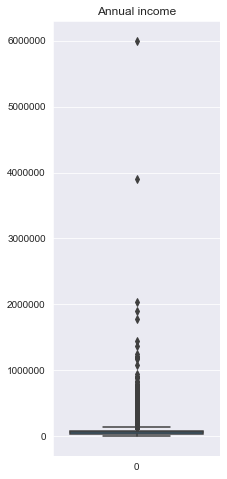

In [155]:
plt.figure(figsize=(3,8))
sns.boxplot(data_df.annual_inc)
plt.title('Annual income')
plt.show()

Here we encounter some outliers. It is evident from the 5 point summary that 75% of the annual incomes are below USD 100K, but the highest income is USD 6M. Analyzing this columns while considering all the values would not yield correct results and therefore we choose drop rows where the annual income is greater than USD 150K.

In [156]:
data_df = data_df[(data_df.annual_inc <= 150_000)]
data_df.annual_inc.describe()

count     37091.000000
mean      61875.090474
std       29125.064445
min        4000.000000
25%       40000.000000
50%       56650.000000
75%       79000.000000
max      150000.000000
Name: annual_inc, dtype: float64

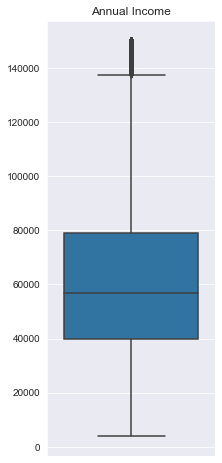

In [157]:
plt.figure(figsize=(3, 8))
sns.boxplot(data_df.annual_inc)
plt.title('Annual Income')
plt.xticks(ticks=[])
plt.show()

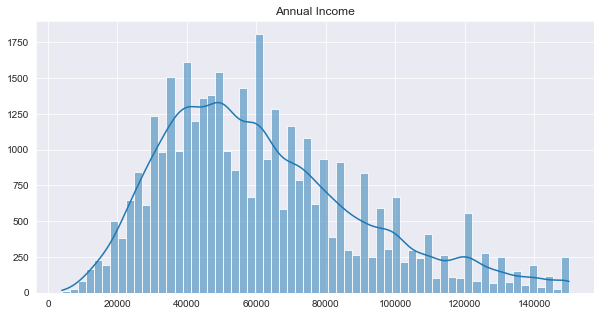

In [158]:
plt.figure(figsize=(10, 5))
sns.histplot(data_df.annual_inc, kde=True)
plt.title('Annual Income')
plt.xlabel("")
plt.ylabel("")
plt.show()


We observe that:
- The median annual income is USD 57K
- Income of most of the applicants lie below USD 80K

# Earliest Credit Line Year

The year the borrower's earliest reported credit line was opened


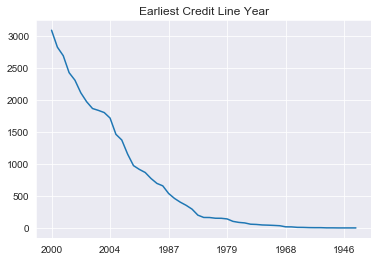

In [159]:
data_df.earliest_cr_line_year.value_counts().plot()
plt.title('Earliest Credit Line Year')
plt.show()

From this description we can understand that the maximum borrowers have their credit line starting in the year 2000

# Earliest Credit Line Month 

The month the borrower's earliest reported credit line was opened


In [160]:
data_df.earliest_cr_line_month.value_counts()

Oct    3836
Dec    3786
Nov    3665
Sep    3391
Jan    3222
Aug    3088
Jul    2862
Jun    2732
May    2708
Feb    2656
Mar    2603
Apr    2542
Name: earliest_cr_line_month, dtype: int64

Text(0.5, 1.0, 'Earliest Credit Line Month')

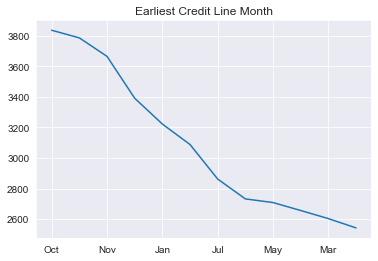

In [161]:
data_df.earliest_cr_line_month.value_counts().plot()
plt.title('Earliest Credit Line Month')

From this graph we can understand that most of the people have prefer to open their credit line in the month of October

# Issued Year and month 

The month and the year in which loan was funded

In [162]:
data_df.issue_d_year.value_counts()

2011    19685
2010    11128
2009     4532
2008     1510
2007      236
Name: issue_d_year, dtype: int64

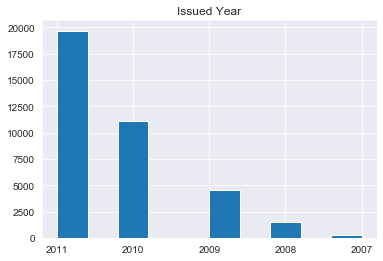

In [163]:
plt.hist(data_df.issue_d_year)
plt.title('Issued Year')
plt.show()

Most of the loans were issued in 2011

In [164]:
data_df.issue_d_month.value_counts()

Dec    4070
Nov    3865
Oct    3579
Sep    3332
Aug    3259
Jul    3232
Jun    3050
May    2811
Apr    2732
Mar    2589
Jan    2293
Feb    2279
Name: issue_d_month, dtype: int64

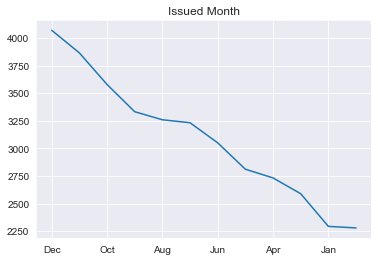

In [165]:
data_df.issue_d_month.value_counts().plot()
plt.title('Issued Month')
plt.show()

Most of the loans were issued in the month of December to the borrowers

# Public Record Bankruptcies

Number of public record bankruptcies

In [166]:
data_df.pub_rec_bankruptcies.value_counts()

0.0    34809
1.0     1608
2.0        5
Name: pub_rec_bankruptcies, dtype: int64

From this values only we can understand that there are very few borrowers who have declared bankruptcy and fewer who have declared bankruptcy twice

# Last Credit Pulled date

The most recent month LC pulled the credit for this loan

In [167]:
data_df.last_credit_pull_d.value_counts()


May-16    8928
Apr-16    2295
Mar-16    1089
Feb-13     795
Feb-16     709
Jan-16     634
Dec-15     620
Mar-13     558
Dec-14     549
Mar-14     535
Jul-14     531
Sep-14     524
Nov-15     515
Jul-15     515
Oct-14     514
Feb-14     512
Aug-14     506
Jan-14     500
Oct-15     490
Sep-15     487
Apr-14     480
Nov-14     477
May-14     459
Nov-13     458
Jun-14     451
May-13     436
Jan-15     419
May-15     410
Dec-13     409
Aug-15     409
Apr-13     409
Oct-13     399
Nov-12     386
Sep-13     378
Jul-13     376
Aug-12     371
Sep-12     371
Apr-15     370
Mar-15     365
Jun-15     361
Jun-13     360
Aug-13     358
Dec-12     358
Feb-12     352
Feb-15     347
Oct-12     324
Mar-12     320
May-12     317
Apr-12     293
Jun-12     292
Jul-12     287
Jan-12     252
Mar-11     248
Aug-11     237
Dec-11     236
Nov-11     197
May-11     185
Jun-11     160
Sep-11     153
Jul-11     147
Feb-11     143
Oct-11     141
Apr-11     131
Jan-11     124
Dec-10     103
Jul-10     101
Sep-10    

# Last Payment Amount

In [168]:
data_df.last_pymnt_amnt.describe()

count    37091.000000
mean      2655.496089
std       4345.724730
min          0.000000
25%        213.365000
50%        548.980000
75%       3336.340000
max      36115.200000
Name: last_pymnt_amnt, dtype: float64

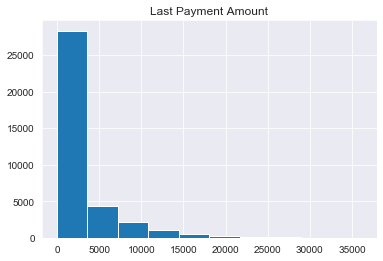

In [169]:
plt.hist(data_df.last_pymnt_amnt)
plt.title("Last Payment Amount")
plt.show()

This graph  shows us that most of the borrower's last transaction was b/w 0-5000

# Last Payment date 

In [170]:
data_df.last_pymnt_d.isna().sum()


71

In [171]:
data_df.last_pymnt_d.value_counts()

Mar-13    988
Dec-14    914
May-13    869
Feb-13    840
Apr-13    823
Mar-12    815
Aug-12    802
Jan-14    801
Aug-14    800
Oct-12    791
Jul-14    788
Mar-14    787
Oct-14    774
Feb-14    763
Dec-13    760
Jun-14    748
Jul-13    743
Jan-13    741
Sep-12    732
Jul-12    716
May-12    716
Nov-12    714
Apr-12    712
Feb-12    710
Aug-13    708
Jun-12    677
Dec-12    677
Jun-13    675
Oct-13    664
May-14    661
Sep-14    653
Sep-13    652
Nov-13    648
Apr-14    646
Nov-14    558
Dec-11    526
Jan-12    525
Mar-11    473
Nov-11    441
Oct-11    441
Sep-11    435
Aug-11    411
Apr-11    404
Jul-11    381
May-11    371
Jun-11    365
Feb-11    323
Jan-15    321
Jan-11    258
Jul-15    235
Dec-10    234
Nov-15    218
Jun-15    213
Oct-10    210
Mar-16    205
Aug-15    198
Nov-10    190
Sep-15    189
Oct-15    177
Jul-10    176
Mar-15    175
Sep-10    174
Jan-16    172
Dec-15    170
Apr-16    163
Feb-16    163
Feb-15    154
May-16    154
Aug-10    144
May-15    142
Apr-15    128
Mar-10

In [172]:
data_df.last_pymnt_d = data_df.last_pymnt_d.fillna('May-16')

In [173]:
data_df.last_pymnt_d.isna().sum()

0

In [174]:
data_df['last_pymnt_month'] = data_df.last_pymnt_d.apply(lambda x: x.split('-')[0])
data_df['last_pymnt_year'] = data_df.last_pymnt_d.apply(lambda x: '20'+x.split('-')[1])
data_df = data_df.drop(['last_pymnt_d'], axis=1)

In [175]:
data_df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'loan_status', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies', 'issue_d_month', 'issue_d_year',
       'earliest_cr_line_month', 'earliest_cr_line_year', 'last_pymnt_month',
       'last_pymnt_year'],
      dtype='object')

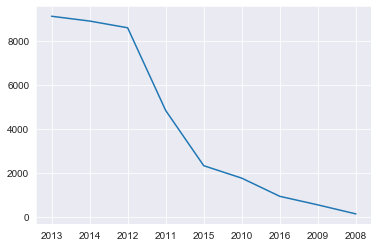

In [176]:
data_df.last_pymnt_year.value_counts().plot()

# Collection Recovery Fee

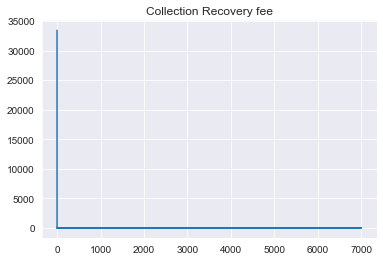

In [177]:
data_df.collection_recovery_fee.value_counts().plot()
plt.title('Collection Recovery fee')
plt.show()

From this chart we can understand that the collection recovery fee is 0 for most of the people and for the rest of them it's even less than 5000

# Recoveries

In [178]:
data_df.recoveries.value_counts()

0.00       33002
11.29          4
10.40          4
13.93          3
12.09          3
           ...  
151.51         1
1753.49        1
240.15         1
385.70         1
507.98         1
Name: recoveries, Length: 3921, dtype: int64

In [179]:
data_df.recoveries.describe()

count    37091.000000
mean        96.458747
std        692.903445
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      29623.350000
Name: recoveries, dtype: float64

As we can this column has same observation most of the rows have 0 recovery and the rest have a minimum amunt

# Total Recovered Late Fee

In [180]:
data_df.total_rec_late_fee.value_counts()


0.000000     35174
15.000000      238
15.000000       58
30.000000       52
15.000000       47
             ...  
20.532495        1
14.931369        1
36.246998        1
81.108708        1
14.943270        1
Name: total_rec_late_fee, Length: 1256, dtype: int64

In [181]:
data_df.total_rec_late_fee.describe()

count    37091.000000
mean         1.349110
std          7.226973
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        180.200000
Name: total_rec_late_fee, dtype: float64

Here also we can that the column doesn't have any significant data

# Total Recovery Interest

In [182]:
data_df.total_rec_int.describe()

count    37091.000000
mean      2050.638009
std       2298.430906
min          0.000000
25%        632.210000
50%       1265.600000
75%       2580.320000
max      23563.680000
Name: total_rec_int, dtype: float64

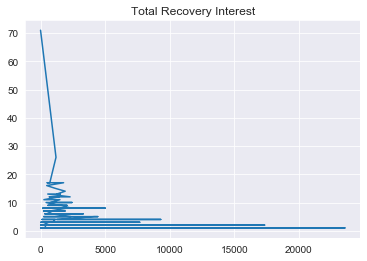

In [183]:
data_df.total_rec_int.value_counts().plot()
plt.title('Total Recovery Interest')
plt.show()

# Total Recovery Principle 

In [184]:
data_df.total_rec_prncp.describe()

count    37091.000000
mean      9378.042337
std       6759.464576
min          0.000000
25%       4400.000000
50%       8000.000000
75%      12726.250000
max      35000.020000
Name: total_rec_prncp, dtype: float64

In [185]:
data_df['total_rec_prncp'].value_counts()

10000.00    2213
12000.00    1738
5000.00     1671
6000.00     1604
15000.00    1316
            ... 
11076.06       1
1889.89        1
1390.24        1
3811.50        1
940.44         1
Name: total_rec_prncp, Length: 6649, dtype: int64

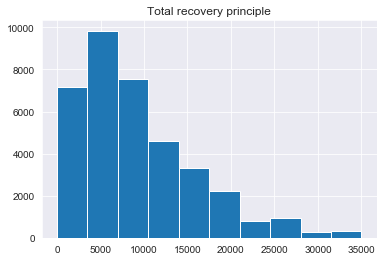

In [186]:
plt.hist(data_df['total_rec_prncp'])
plt.title('Total recovery principle')
plt.show()
#data1['total_rec_late_fee'].value_counts()

# Total Payment Funded by Investors

Total payment received for the amount invested by the investors

In [187]:
data_df.total_pymnt_inv.describe()

count    37091.000000
mean     10945.575789
std       8376.202930
min          0.000000
25%       4923.960000
50%       8850.730000
75%      14859.210000
max      58563.680000
Name: total_pymnt_inv, dtype: float64

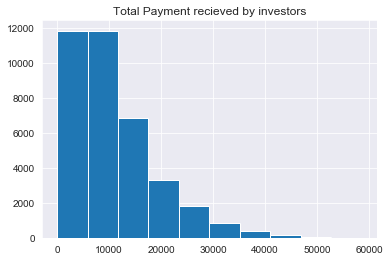

In [188]:
#plt.boxplot(data_df.total_pymnt_inv)
plt.hist(data_df.total_pymnt_inv)
plt.title('Total Payment recieved by investors')
plt.show()

From this we can understand that the maximum payment the investors got for their investment was under 10000 USD

# Total Payment 

In [189]:
data_df['total_pymnt'].value_counts()

11196.569430    26
0.000000        16
11784.232230    16
10956.775960    16
5478.387981     15
                ..
32897.190000     1
5627.546774      1
7468.700933      1
12213.383560     1
9739.265114      1
Name: total_pymnt, Length: 35319, dtype: int64

In [190]:
data_df.total_pymnt.describe()

count    37091.000000
mean     11526.488124
std       8486.971469
min          0.000000
25%       5434.145394
50%       9418.908110
75%      15578.369135
max      58563.679930
Name: total_pymnt, dtype: float64

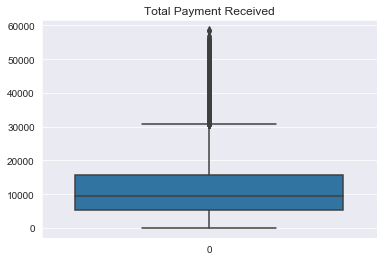

In [191]:
sns.boxplot(data_df['total_pymnt'])
plt.title('Total Payment Received')
plt.show()


In [192]:
data_df.total_pymnt.median()

9418.90811

From this we can understand that the median amount of the total payment received is 9638 USD

# Out Principal Invested by Investors

Remaining outstanding principal for total amount funded by investors

In [193]:
data_df.out_prncp_inv.describe()

count    37091.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: out_prncp_inv, dtype: float64

In [194]:
data_df.out_prncp.value_counts()

0.0    37091
Name: out_prncp, dtype: int64

From the above data we can understand that most of the investors money has been paid

# Out Principal

Remaining outstanding principal for total amount funded


In [195]:
data_df.out_prncp.describe()

count    37091.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: out_prncp, dtype: float64

In [196]:
data_df.out_prncp.value_counts()

0.0    37091
Name: out_prncp, dtype: int64

From these two insights we can understand that most of the people have 0 outstanding principle to be paid

# Total Accounts

The total number of credit lines currently in the borrower's credit file


In [197]:
data_df.total_acc.value_counts()

16    1394
15    1392
14    1377
17    1367
20    1360
18    1348
13    1344
21    1326
12    1279
19    1262
11    1221
22    1215
24    1175
23    1175
10    1154
25    1086
9     1044
27    1002
8      978
26     966
28     892
29     851
7      808
30     788
31     719
32     714
6      669
34     573
33     567
5      542
35     508
36     466
37     423
4      414
38     405
39     387
40     294
42     253
41     248
43     228
44     202
3      179
46     168
45     161
47     153
48     128
49     111
50     101
63      84
52      83
51      71
53      71
54      52
55      45
57      39
56      39
61      37
59      36
62      34
58      28
60      22
66       4
64       4
2        3
65       3
67       3
76       2
79       1
90       1
69       1
68       1
74       1
87       1
71       1
72       1
78       1
81       1
73       1
75       1
80       1
70       1
Name: total_acc, dtype: int64

In [198]:
data_df.total_acc.describe()

count    37091.000000
mean        21.715834
std         11.262141
min          2.000000
25%         13.000000
50%         20.000000
75%         28.000000
max         90.000000
Name: total_acc, dtype: float64

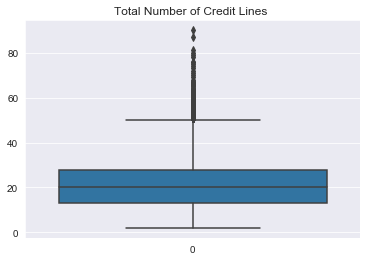

In [199]:
sns.boxplot(data_df.total_acc)
plt.title('Total Number of Credit Lines ')
plt.show()

# Revolving Credit Utilization 

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


In [200]:
data1 = data_df.revol_util

In [201]:
arr=[]
for i in data1:
        if type(i)== str:
            i= i.rstrip('%')
            arr.append(i)

In [202]:
for i in range(len(arr)):
    arr[i] = float(arr[i])

In [203]:
indi = data_df[data_df.revol_util.isna()].index.tolist()

In [204]:
for j in range(len(indi)):
        arr.insert(indi[j],0)


In [205]:
data_df.revol_util=arr

In [206]:
data_df.revol_util.describe()

count    37091.000000
mean        48.595903
std         28.333724
min          0.000000
25%         25.100000
50%         49.000000
75%         72.100000
max         99.900000
Name: revol_util, dtype: float64

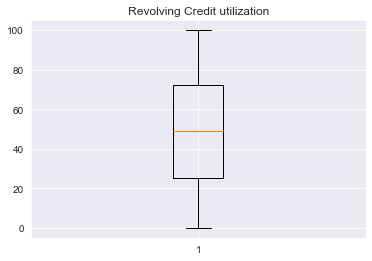

In [207]:
plt.boxplot(data_df.revol_util)
plt.title('Revolving Credit utilization')
plt.show()

In [208]:
sns.__version__

'0.12.2'

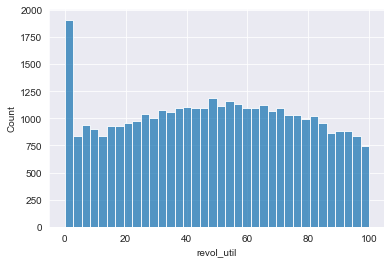

In [209]:
sns.histplot(data_df.revol_util)

From this we can understand the percentage of the revolving credit utilization done by the borrower

# Revolving balance

Total credit revolving balance

In [210]:
data_df.revol_bal.describe()

count     37091.000000
mean      12482.104796
std       14094.126195
min           0.000000
25%        3581.500000
50%        8557.000000
75%       16303.000000
max      149000.000000
Name: revol_bal, dtype: float64

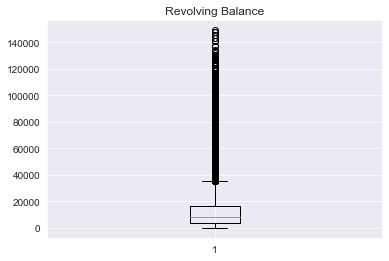

In [211]:
plt.boxplot(data_df.revol_bal)
plt.title('Revolving Balance')
plt.show()

From the initial analysis we can understand that the median of the total revolving balance is less than 9000 USD

# Public Records

The number of derogatory public records

In [212]:
data_df.pub_rec.describe()

count    37091.000000
mean         0.056456
std          0.239516
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          4.000000
Name: pub_rec, dtype: float64

In [213]:
data_df.pub_rec.value_counts()



0    35061
1     1976
2       46
3        6
4        2
Name: pub_rec, dtype: int64

These number show that the maximum of the borrowers don't have derogaotry public records

# Open Credit lines

The number of open credit lines in the borrower's credit file.

In [214]:
data_df.open_acc.describe()

count    37091.000000
mean         9.185948
std          4.360811
min          2.000000
25%          6.000000
50%          8.000000
75%         12.000000
max         44.000000
Name: open_acc, dtype: float64

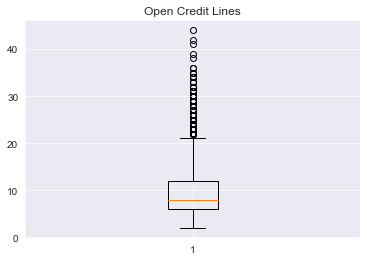

In [215]:
plt.boxplot(data_df.open_acc)
plt.title('Open Credit Lines')
plt.show()

A borrower has on an average 9 credit lines open on his/her name

## Step 2 Bivariate Analysis

Amount of Revolving credit based on number of credit lines

Loan Amount based on purpose 

In [216]:
data2 = data_df[['loan_status','purpose','loan_amnt']]

In [217]:
data2.groupby(['loan_status','purpose']).sum()

loan_amnt
loan_status purpose                      
Charged Off car                   1155775
            credit_card           6767000
            debt_consolidation   35852775
            educational            419100
            home_improvement      3700075
            house                  670775
            major_purchase        1941775
            medical                904750
            moving                 509125
            other                 4860225
            renewable_energy       135000
            small_business        6608025
            vacation               301425
            wedding               1012150
Fully Paid  car                   8597975
            credit_card          47989375
            debt_consolidation  178350150
            educational           1644400
            home_improvement     24207575
            house                 3509725
            major_purchase       14233575
            medical               4208300
            moving                2903800
            other                23791800
            renewable_energy       636775
            small_business       14661925
            vacation              1646925
            wedding               7663500

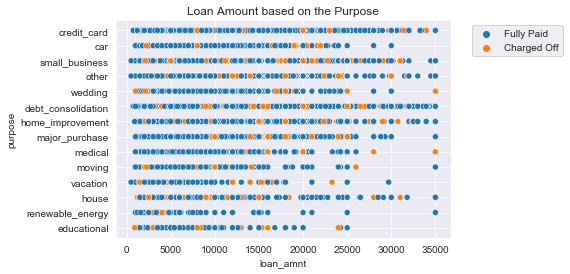

In [218]:
g = sns.scatterplot(x='loan_amnt',
               y='purpose',data=data2,
               hue='loan_status')
a = data2.purpose.value_counts().index


plt.title('Loan Amount based on the Purpose')

plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

In [219]:
a = data2.loan_amnt.sum()
fig = px.scatter(data2,x='purpose', y= 'loan_amnt', size = 'loan_amnt')
fig.show()

Relation of loan amount and Annual income

In [220]:
loan_purpose= data_df.groupby('purpose').sum() 
loan_purpose

id    member_id  loan_amnt  funded_amnt  \
purpose                                                                
car                   995125901   1244904345    9753750      9671950   
credit_card          3340693304   4143616615   54756375     53488375   
debt_consolidation  12049328404  15016876059  214202925    209221350   
educational           132532553    156360351    2063500      2025025   
home_improvement     1770029458   2209558652   27907650     27156975   
house                 231023477    286928515    4180500      4052275   
major_purchase       1351981367   1697832701   16175350     15841925   
medical               444578376    554048257    5113050      5025925   
moving                373808578    466683145    3412925      3340575   
other                2394522483   2979259014   28652025     28062575   
renewable_energy       66484588     83374103     771775       750325   
small_business       1072081874   1324882034   21269950     20496900   
vacation              257359769    322257666    1948350      1916400   
wedding               596219488    741414272    8675650      8566075   

                    funded_amnt_inv    term   int_rate  installment  \
purpose                                                               
car                    9.367154e+06   64812   15362.96    275581.32   
credit_card            5.071186e+07  195972   56080.45   1634168.83   
debt_consolidation     1.993828e+08  742632  215884.54   6238128.33   
educational            1.683703e+06   11652    3645.56     65907.39   
home_improvement       2.574378e+07  111960   29437.70    785908.91   
house                  3.854146e+06   14844    4184.97    119437.35   
major_purchase         1.522812e+07   84156   22277.69    472357.53   
medical                4.817111e+06   27024    7452.15    147605.57   
moving                 3.209200e+06   22068    6394.22    101331.14   
other                  2.622725e+07  150624   43516.18    853227.58   
renewable_energy       6.847353e+05    4020    1079.06     21812.01   
small_business         1.846248e+07   71040   21242.63    611422.74   
vacation               1.845462e+06   14508    3969.32     57975.94   
wedding                8.043881e+06   37116   10622.31    259374.12   

                      annual_inc        dti  delinq_2yrs  inq_last_6mths  \
purpose                                                                    
car                 8.607274e+07   16320.03          221            1297   
credit_card         3.123124e+08   71136.85          502            3573   
debt_consolidation  1.075734e+09  254317.38         2330           14379   
educational         1.496540e+07    3521.39           49             350   
home_improvement    1.892847e+08   29993.23          458            2876   
house               2.234205e+07    3712.13           52             503   
major_purchase      1.213352e+08   22491.53          347            1736   
medical             3.881577e+07    8031.51          136             608   
moving              3.063594e+07    6529.93           91             496   
other               2.114833e+08   46047.37          665            3363   
renewable_energy    5.795471e+06    1174.20           14              67   
small_business      1.086291e+08   18463.81          300            1751   
vacation            2.077941e+07    4548.07           61             309   
wedding             5.682385e+07   11236.05          164             775   

                    open_acc  pub_rec  revol_bal  revol_util  total_acc  \
purpose                                                                   
car                    12496       85   14783763    64663.21      30035   
credit_card            46952      273   79408696   251787.63     109090   
debt_consolidation    167668     1009  242147980   881442.72     394009   
educational             2782       13    2639414    14225.69       5734   
home_improvement       24391      176   28014497   115303.43      62165 

In [221]:
fig=px.scatter(loan_purpose,x='annual_inc', y=loan_purpose.index, size='loan_amnt')
fig.show()

Percentage of amount funded by investors over the years and the purpose of loans for which it was used

In [222]:
data_df['percent_inv'] = (data_df['funded_amnt_inv']/data_df['total_pymnt_inv'] )* 100
data_df['percent_inv'] = data_df.percent_inv.fillna(0)
data_df.percent_inv.isna().sum()

0

In [223]:
funded_percent_inv = data_df.groupby(['purpose']).mean()
funded_percent_inv = funded_percent_inv[-funded_percent_inv.percent_inv.apply(lambda x: math.isinf(x))]
fig=px.scatter(funded_percent_inv,x=funded_percent_inv.index, y=funded_percent_inv.percent_inv,size='percent_inv')
fig.show()

Percentage of amount lent and the purpose it was used in

In [224]:
#data_df['percent'] = (data_df['funded_amnt']/data_df['total_pymnt'] )* 100


In [225]:
funded_percent = data_df.groupby(['purpose']).mean()

#funded_percent= funded_percent[-funded_percent['percent'].apply(lambda x: math.isinf(x))]
fig=px.scatter(funded_percent,x=funded_percent.index, y=funded_percent.funded_amnt,size='funded_amnt')
fig.show()

House ownership related to loan status

In [226]:
data_df.groupby(['home_ownership','loan_status']).count()

id  member_id  loan_amnt  funded_amnt  \
home_ownership loan_status                                             
MORTGAGE       Charged Off   2221       2221       2221         2221   
               Fully Paid   13759      13759      13759        13759   
NONE           Fully Paid       3          3          3            3   
OTHER          Charged Off     17         17         17           17   
               Fully Paid      76         76         76           76   
OWN            Charged Off    438        438        438          438   
               Fully Paid    2442       2442       2442         2442   
RENT           Charged Off   2788       2788       2788         2788   
               Fully Paid   15347      15347      15347        15347   

                            funded_amnt_inv   term  int_rate  installment  \
home_ownership loan_status                                                  
MORTGAGE       Charged Off             2221   2221      2221         2221   
               Fully Paid             13759  13759     13759        13759   
NONE           Fully Paid                 3      3         3            3   
OTHER          Charged Off               17     17        17           17   
               Fully Paid                76     76        76           76   
OWN            Charged Off              438    438       438          438   
               Fully Paid              2442   2442      2442         2442   
RENT           Charged Off             2788   2788      2788         2788   
               Fully Paid             15347  15347     15347        15347   

                            grade  sub_grade  emp_title  emp_length  \
home_ownership loan_status                                            
MORTGAGE       Charged Off   2221       2221       2028        2140   
               Fully Paid   13759      13759      13014       13424   
NONE           Fully Paid       3          3          1           3   
OTHER          Charged Off     17         17         17          17   
               Fully Paid      76         76         74          76   
OWN            Charged Off    438        438        363         396   
               Fully Paid    2442       2442       2146        2281   
RENT           Charged Off   2788       2788       2593        2686   
               Fully Paid   15347      15347      14616       15051   

                            annual_inc  verification_status    url   desc  \
home_ownership loan_status                                                  
MORTGAGE       Charged Off        2221                 2221   2221   1533   
               Fully Paid        13759                13759  13759   9183   
NONE           Fully Paid            3                    3      3      3   
OTHER          Charged Off          17                   17     17     17   
               Fully Paid           76                   76     76     76   
OWN            Charged Off         438                  438    438    297   
               Fully Paid         2442                 2442   2442   1619   
RENT           Charged Off        2788                 2788   2788   1858   
               Fully Paid        15347                15347  15347  10483   

                            purpose  title  zip_code  addr_state    dti  \
home_ownership loan_status                                                
MORTGAGE       Charged Off     2221   2220      2221        2221   2221   
               Fully Paid     13759  13756     13759       13759  13759   
NONE           Fully Paid         3      3         3           3      3   
OTHER          Charged Off       17     17        17          17     17   
               Fully Paid        76     76        76          76     76   
OWN            Charged Off      438    438       438         438    438   
               Fully Paid      2442   2439      2442        2442   2442   
RENT           Charged Off     2788   2787      2788        2788   2788   
          

## Interest rate vs term

In [228]:
interest = data_df.groupby('term').mean()

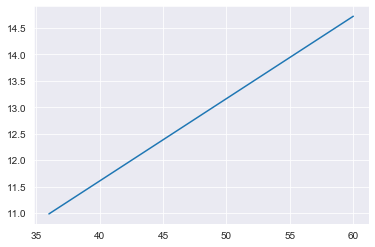

In [229]:
plt.plot(interest.index, interest.int_rate)
plt.show()

From this graph we are able to see that the average interest rate for the term of 60 months is high thus it explains the previous graph which showed the high amounts of outstanding principle amount.

## Earliest Credit Line vs loan amount

In [230]:
early_credit_year_loan = data_df.groupby('earliest_cr_line_year').mean()

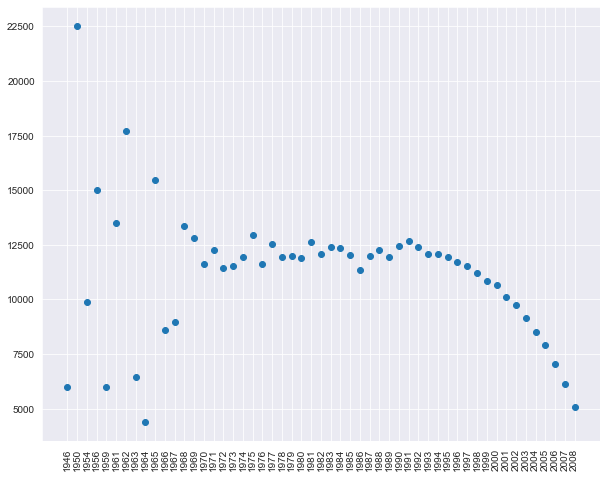

In [231]:
plt.figure(figsize=(10,8))
plt.scatter(early_credit_year_loan.index, early_credit_year_loan.loan_amnt)
plt.xticks(rotation=90)
plt.show()

From this we can understand that the borrower's who had their credit line opened earlier have taken on an average bigger loans than the ones who have opened their credit loans recently

In [232]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37091 entries, 0 to 39716
Data columns (total 49 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       37091 non-null  int64  
 1   member_id                37091 non-null  int64  
 2   loan_amnt                37091 non-null  int64  
 3   funded_amnt              37091 non-null  int64  
 4   funded_amnt_inv          37091 non-null  float64
 5   term                     37091 non-null  int64  
 6   int_rate                 37091 non-null  float64
 7   installment              37091 non-null  float64
 8   grade                    37091 non-null  object 
 9   sub_grade                37091 non-null  object 
 10  emp_title                34852 non-null  object 
 11  emp_length               36074 non-null  object 
 12  home_ownership           37091 non-null  object 
 13  annual_inc               37091 non-null  float64
 14  verification_status   

## OPEN ACCOUNTS


open account vs loan_amnt

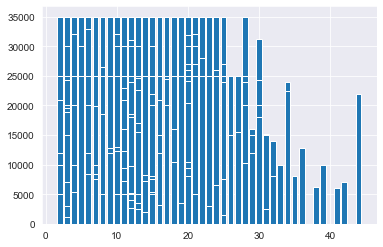

In [233]:
plt.bar(data_df.open_acc,data_df.loan_amnt)
plt.show()

open account vs annual income

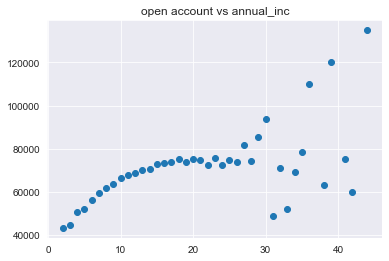

In [234]:
openacc_ann = data_df.groupby('open_acc').mean()
plt.scatter(openacc_ann.index, openacc_ann.annual_inc)
plt.title("open account vs annual_inc")
plt.show()

open account vs funded amount  

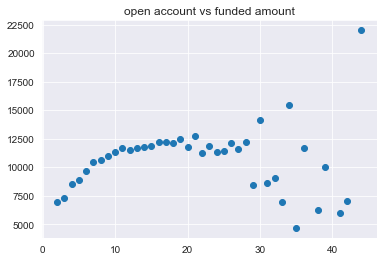

In [235]:
plt.scatter(openacc_ann.index, openacc_ann.funded_amnt)
plt.title('open account vs funded amount')
plt.show()

Open account vs funded amount invested by investors

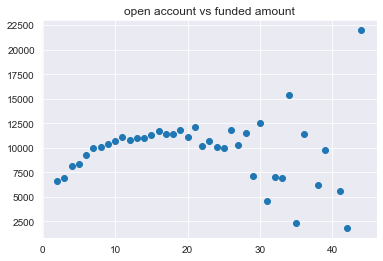

In [236]:
plt.scatter(openacc_ann.index, openacc_ann.funded_amnt_inv)
plt.title('open account vs funded amount')
plt.show()

Open account vs interest rate 

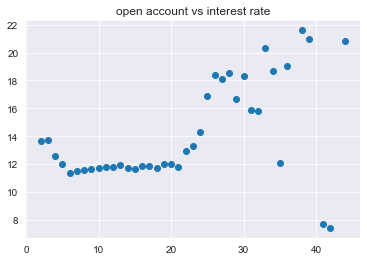

In [237]:
plt.scatter(openacc_ann.index, openacc_ann.int_rate)
plt.title('open account vs interest rate')
plt.show()

open account vs grade 

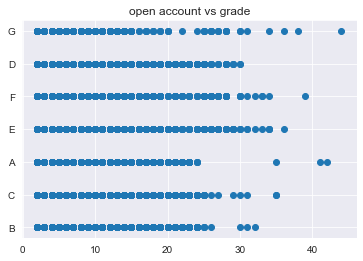

In [238]:
plt.scatter(data_df.open_acc, data_df.grade)
plt.title('open account vs grade')
plt.show()

Open account vs loan status

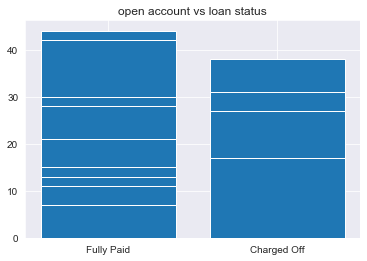

In [239]:
plt.bar(data_df.loan_status,data_df.open_acc )
plt.title('open account vs loan status')
plt.show()

Open account vs Purpose

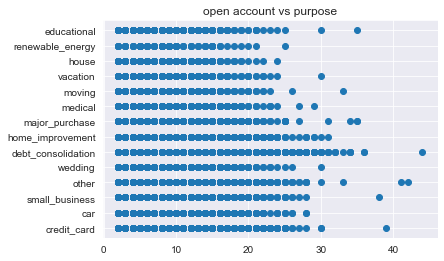

In [240]:
plt.scatter(data_df.open_acc, data_df.purpose)
plt.title('open account vs purpose')
plt.show()

From this data we can understand that most of the borrower's had their open credit lines under 30 accounts

### Open accounts vs dti 

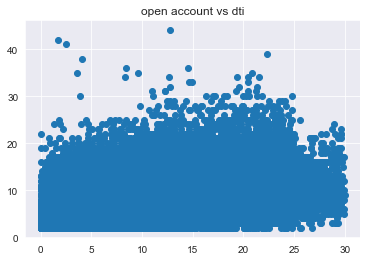

In [241]:
plt.scatter(data_df.dti, data_df.open_acc)
plt.title('open account vs dti')
plt.show()

OPEN accounts vs Revolving balance

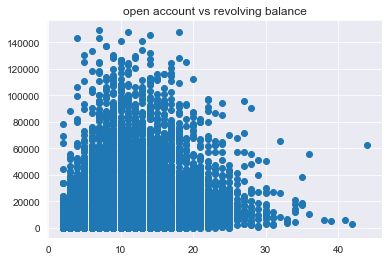

In [242]:
plt.scatter(data_df.open_acc, data_df.revol_bal)
plt.title('open account vs revolving balance')
plt.show()

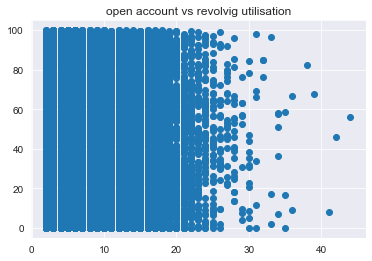

In [243]:
plt.scatter(data_df.open_acc, data_df.revol_util)
plt.title('open account vs revolvig utilisation')
plt.show()

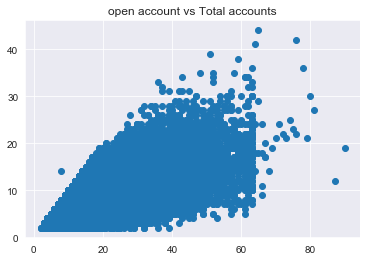

In [244]:
plt.scatter(data_df.total_acc, data_df.open_acc)
plt.title('open account vs Total accounts')
plt.show()

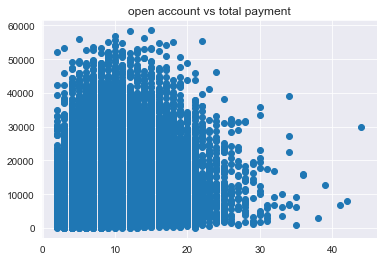

In [247]:
plt.scatter(data_df.open_acc, data_df.total_pymnt)
plt.title('open account vs total payment')
plt.show()

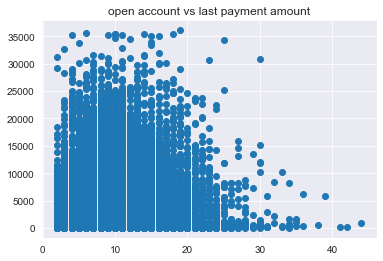

In [248]:
plt.scatter(data_df.open_acc, data_df.last_pymnt_amnt)
plt.title('open account vs last payment amount')
plt.show()

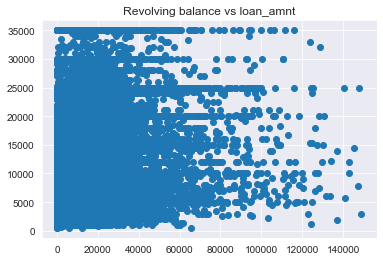

In [249]:
plt.scatter(data_df.revol_bal, data_df.loan_amnt)
plt.title('Revolving balance vs loan_amnt')
plt.show()

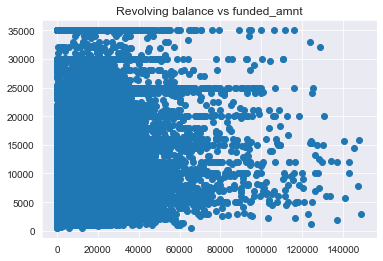

In [250]:
plt.scatter(data_df.revol_bal, data_df.funded_amnt)
plt.title('Revolving balance vs funded_amnt')
plt.show()

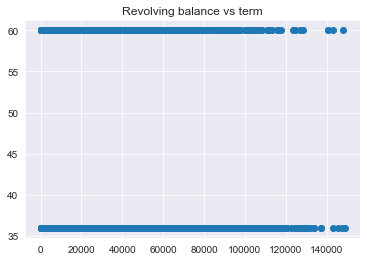

In [251]:
plt.scatter(data_df.revol_bal, data_df.term)
plt.title('Revolving balance vs term')
plt.show()

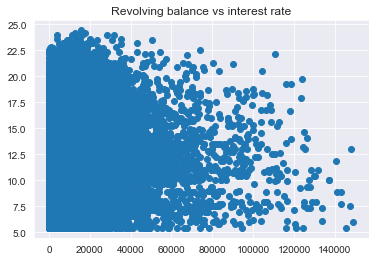

In [252]:
plt.scatter(data_df.revol_bal, data_df.int_rate)
plt.title('Revolving balance vs interest rate')
plt.show()

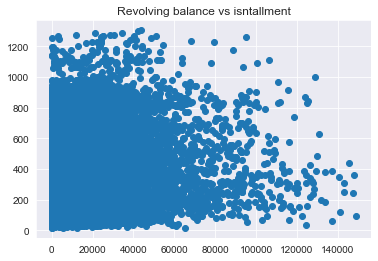

In [253]:
plt.scatter(data_df.revol_bal, data_df.installment)
plt.title('Revolving balance vs isntallment')
plt.show()

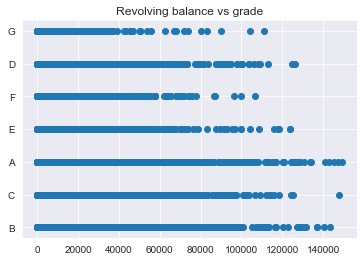

In [254]:
plt.scatter(data_df.revol_bal, data_df.grade)
plt.title('Revolving balance vs grade')
plt.show()

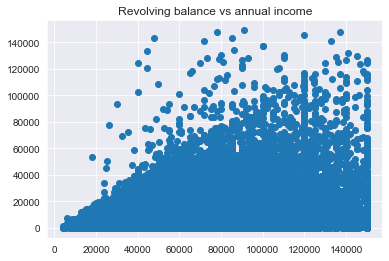

In [255]:
plt.scatter( data_df.annual_inc,data_df.revol_bal)
plt.title('Revolving balance vs annual income')
plt.show()

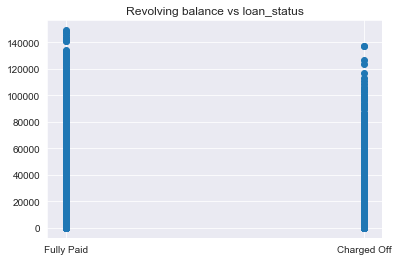

In [256]:
plt.scatter( data_df.loan_status,data_df.revol_bal)
plt.title('Revolving balance vs loan_status')
plt.show()

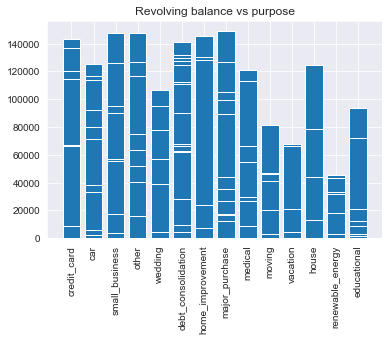

In [257]:
plt.bar( data_df.purpose,data_df.revol_bal)
plt.title('Revolving balance vs purpose')
plt.xticks(rotation = 90)
plt.show()

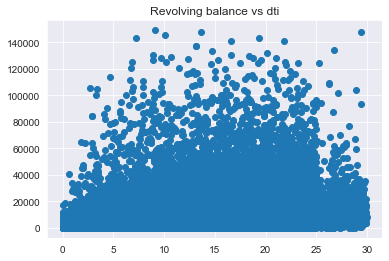

In [258]:
plt.scatter( data_df.dti,data_df.revol_bal)
plt.title('Revolving balance vs dti')
plt.show()

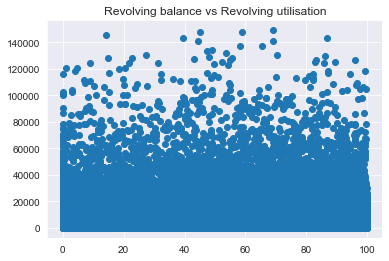

In [259]:
plt.scatter( data_df.revol_util,data_df.revol_bal)
plt.title('Revolving balance vs Revolving utilisation')
plt.show()

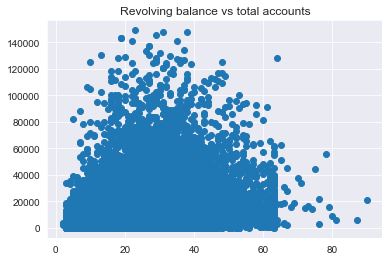

In [260]:
plt.scatter( data_df.total_acc,data_df.revol_bal)
plt.title('Revolving balance vs total accounts')
plt.show()

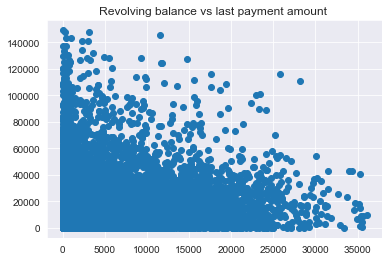

In [264]:
plt.scatter( data_df.last_pymnt_amnt,data_df.revol_bal)
plt.title('Revolving balance vs last payment amount ')
plt.show()

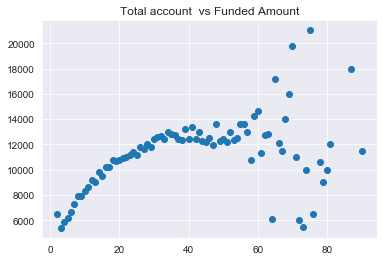

In [270]:
total_acc_1 = data_df.groupby('total_acc').mean()


plt.scatter( total_acc_1.index,total_acc_1.funded_amnt)
plt.title('Total account  vs Funded Amount')
plt.show()

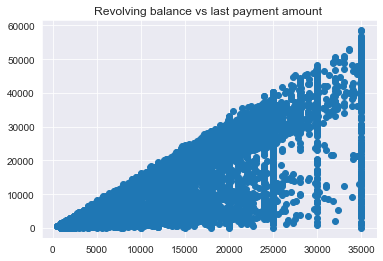

In [273]:
plt.scatter(data_df.funded_amnt, data_df.total_pymnt)
plt.title('Revolving balance vs last payment amount ')
plt.show()

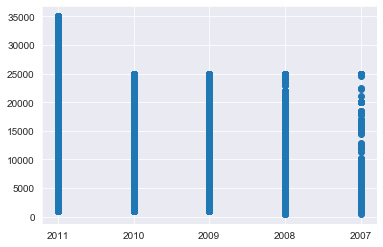

In [277]:
plt.scatter(data_df.issue_d_year, data_df.loan_amnt)
plt.show()

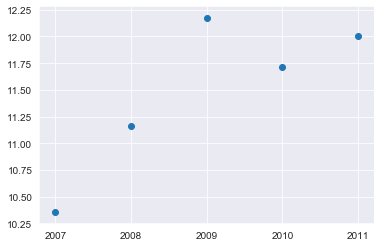

In [285]:
year = data_df.groupby('issue_d_year').mean()
plt.scatter(year.index, year.int_rate)
plt.show()

Purpose, Loan Amount, Funded Amount, Funded amount invested, Annual Income, Term, Interest Rate, Revolving utilisation

## STEP 3 Bi-variate analysis on driver variables

In [290]:
data_driver = data_df[['purpose','loan_amnt','funded_amnt','funded_amnt_inv','annual_inc','term','int_rate','revol_util']]

In [298]:
data_driver.reset_index()

data_driver = data_driver[['purpose','loan_amnt','funded_amnt','funded_amnt_inv','annual_inc','term','int_rate','revol_util']]

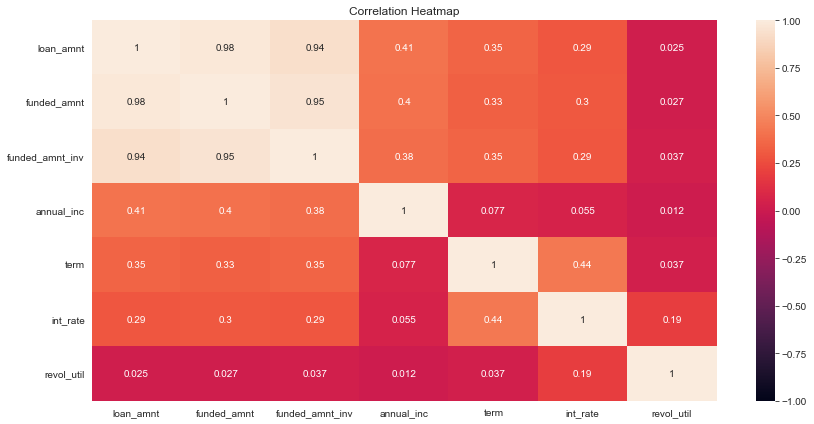

In [302]:
plt.figure(figsize=(14,7))
hm= sns.heatmap(data_driver.corr(),vmin =-1, vmax=1, annot=True)
hm.set_title('Correlation Heatmap')
plt.show()

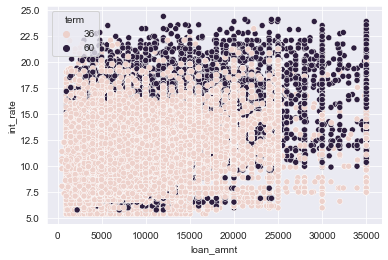

In [317]:
sns.scatterplot(data_driver, x='loan_amnt',y='int_rate',hue='term')
plt.show()

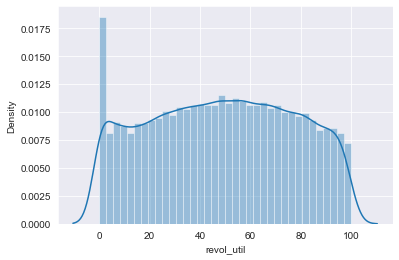

In [318]:
sns.distplot(data_driver.revol_util)
plt.show()

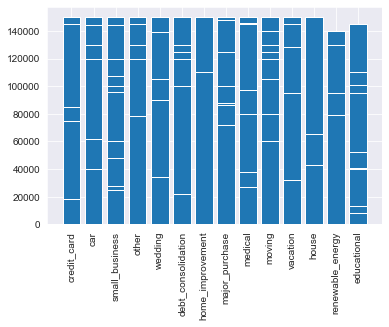

In [324]:
# fig, ax = plt.subplots(ncols=3,nrows=2,sharex=True,sharey=True)

# ax[0][0].plot(data_driver.purpose, data_driver.int_rate)
plt.bar(data_driver.purpose, data_driver.annual_inc)
plt.xticks(rotation=90)
plt.show()

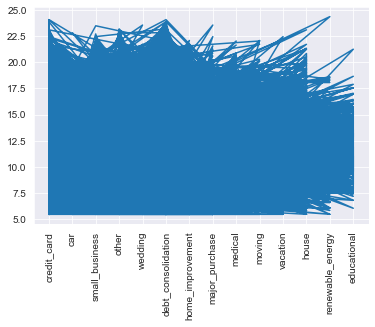

In [325]:

plt.plot(data_driver.purpose, data_driver.int_rate)
plt.xticks(rotation=90)
plt.show()

In [326]:
funded_percent = data_df.groupby(['purpose']).mean()

#funded_percent= funded_percent[-funded_percent['percent'].apply(lambda x: math.isinf(x))]
fig=px.scatter(funded_percent,x=funded_percent.index, y=funded_percent.funded_amnt,size='funded_amnt')
fig.show()

In [327]:
fig=px.scatter(loan_purpose,x='annual_inc', y=loan_purpose.index, size='loan_amnt')
fig.show()